In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns

In [42]:
data = pd.read_csv(r'properatti.csv', delimiter = ',', index_col=0)
#df.head()
data.shape

(121220, 25)

In [37]:
data.columns.values

array(['operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'], dtype=object)

<AxesSubplot: >

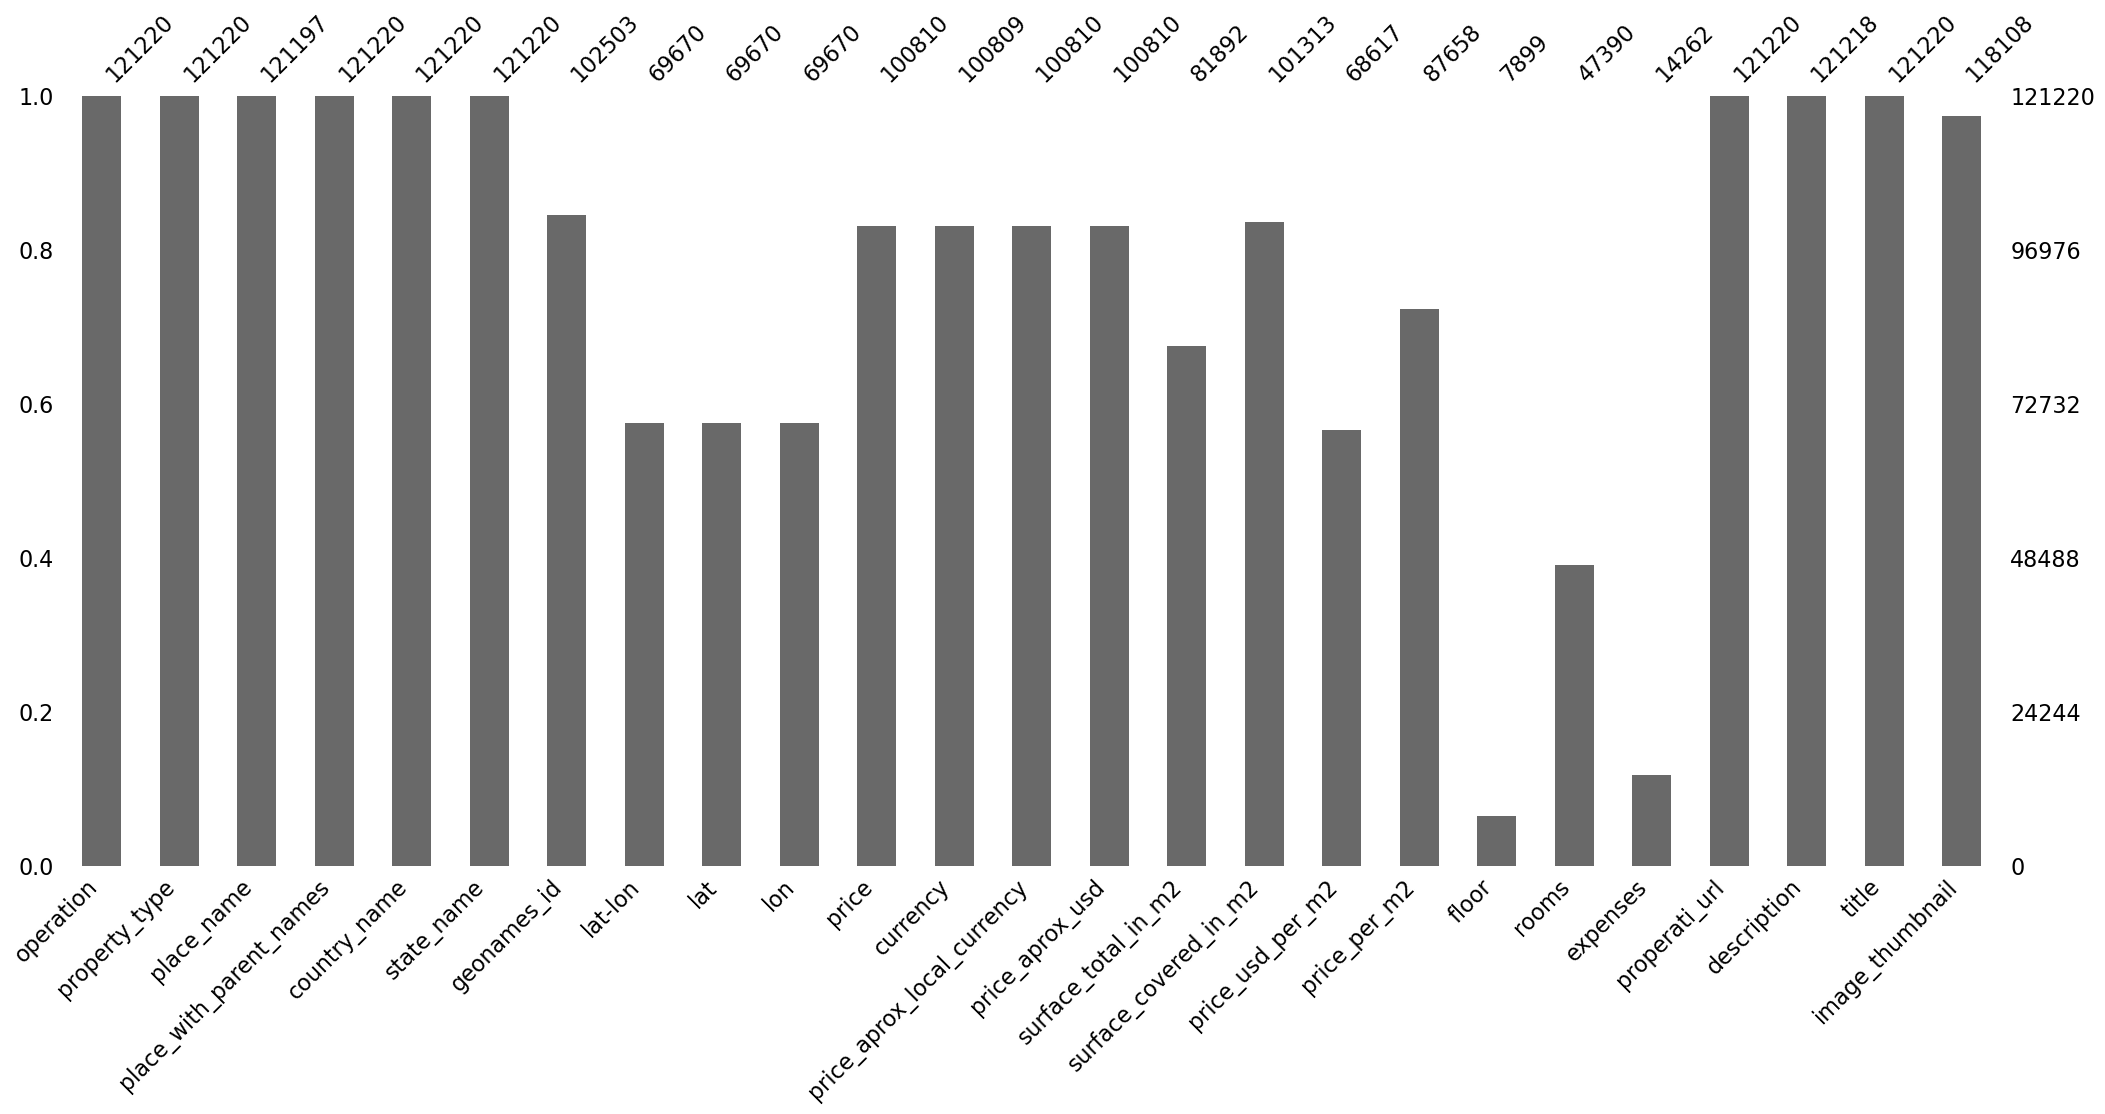

In [38]:
# Para saber valores no nulos

msno.bar(data)

<AxesSubplot: >

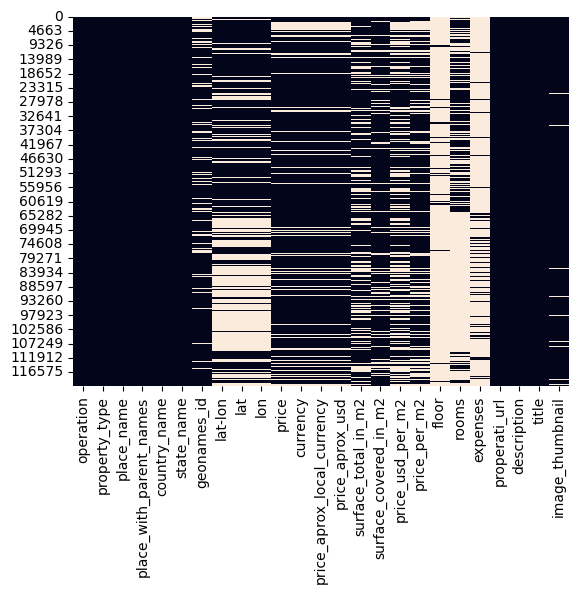

In [31]:
sns.heatmap(df.isnull(), cbar = False)

In [45]:
# Nombre de las columnas
print(data.columns)

data['operation'].value_counts()

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'],
      dtype='object')


sell    121220
Name: operation, dtype: int64

In [44]:
for i in data.columns:
    print(i, ":")
    print(data[i].value_counts(), "\n")


operation :
sell    121220
Name: operation, dtype: int64 

property_type :
apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64 

place_name :
Córdoba               9254
Rosario               8504
Mar del Plata         6534
Tigre                 3324
Nordelta              3315
                      ... 
Sierras Bayas            1
Paso de los Libres       1
Azara                    1
Coronel Du Graty         1
Altos de Hudson I        1
Name: place_name, Length: 1060, dtype: int64 

place_with_parent_names :
|Argentina|Santa Fe|Rosario|                                        8504
|Argentina|Córdoba|Córdoba|                                         6606
|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|              6534
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|                 3315
|Argentina|Capital Federal|Belgrano|                                2992
                                                                 

1. Lectura del dataframe.
    1.1 Descripción breve del contenido de las columnas (Moises)
2. Conocer valores no nulos por columna. 
3. Conocer la variabilidad de cada columna ----- (Eliminar columnas : operation, country_name). 
4. Determinar columnas a completar los valores faltantes y el método a considerar. 
    4.1 Completar columnas geonames_id, lat, long (Santiago) 
    4.2 Completar columnas con datos faltantes a partir de ReGEX construidas con información en columnas title y description (William y Moises)


In [49]:
# mEliminar columnas con valores únicos en descripción
data.drop(['operation', 'country_name'], axis = 1, inplace = True)
data.shape

(121220, 23)

In [51]:
data['geonames_id']

0         3430787.0
1         3432039.0
2         3430787.0
3         3431333.0
4         3435548.0
            ...    
121215    3436077.0
121216    3436080.0
121217    3433775.0
121218          NaN
121219    3433955.0
Name: geonames_id, Length: 121220, dtype: float64

In [52]:
data.head(10)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
5,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Entre Ríos,3433657.0,"-33.0140714,-58.519828",-33.014071,-58.519828,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bop_venta_depart...,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ...",https://thumbs4.properati.com/6/q-w68gvaUEQVXI...
6,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,130000.0,USD,...,78.0,1226.415094,1666.666667,NaN,NaN,NaN,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",https://thumbs4.properati.com/5/6GOXsHCyDu1aGx...
7,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,USD,...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
8,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,USD,...,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
9,house,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,3838574.0,"-32.942031,-60.7259192",-32.942031,-60.725919,460000.0,ARS,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15box_venta_casa_r...,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...,WHITE 7637 - 2 DORMITORIOS CON PATIO,https://thumbs4.properati.com/8/RCf1YEWdF4rv98.

In [67]:
data.loc[data['geonames_id'].isnull(),:] #['place_with_parent_names'].value_counts()

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
11,house,San Miguel,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel|,Bs.As. G.B.A. Zona Norte,NaN,"-34.5390571,-58.7196093",-34.539057,-58.719609,150000.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bp0_venta_casa_s...,"Entrada de Coche, Jardin, Living en desnivel, ...",CHALET,https://thumbs4.properati.com/4/pH0MnS_2zCGOHR...
17,apartment,Barrio El Golf,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Bs.As. G.B.A. Zona Norte,NaN,"-34.4087174767,-58.6343892841",-34.408717,-58.634389,315000.0,USD,...,78.0,1789.772727,4038.461538,NaN,3.0,NaN,http://www.properati.com.ar/15bpl_venta_depart...,Excelente 3 ambientes en un 6 piso y con terra...,3 ambientes en venta en Acqua Golf 1 en Nordel...,https://thumbs4.properati.com/8/txJsOWitsI5tjM...
23,apartment,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,NaN,82000.0,USD,...,42.0,1708.333333,1952.380952,NaN,2.0,NaN,http://www.properati.com.ar/15bqt_venta_depart...,"Hermoso departamento, ubicado en la calle Almi...","Excelente departamento, Impecable!!! APTO CRED...",https://thumbs4.properati.com/8/BHyv2zmce3bVoU...
26,house,Barrio San Gabriel,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Barr...,Bs.As. G.B.A. Zona Norte,NaN,"-34.3640924,-58.6897345",-34.364092,-58.689735,265000.0,USD,...,190.0,1152.173913,1394.736842,NaN,NaN,NaN,http://www.properati.com.ar/15bqx_venta_casa_b...,Casa en venta en complejo Villanueva barrio Sa...,Casa muy linda en San Gabriel Villanueva,https://thumbs4.properati.com/2/DWZjGcq_Z-PKSC...
27,house,Estancias del Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Esta...,Bs.As. G.B.A. Zona Norte,NaN,"-34.4794863,-58.9845412",-34.479486,-58.984541,650000.0,USD,...,425.0,1529.411765,1529.411765,NaN,NaN,NaN,http://www.properati.com.ar/15bqz_venta_casa_e...,Estancias propone vivir rodeados de naturaleza...,Excelente Propiedad!!!! en Estancias del Pilar,https://thumbs4.properati.com/9/5zWFkmq9zHuXyZ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121136,apartment,Palermo Hollywood,|Argentina|Capital Federal|Palermo|Palermo Hol...,Capital Federal,NaN,NaN,NaN,NaN,102000.0,USD,...,33.0,2756.756757,3090.909091,NaN,NaN,NaN,http://www.properati.com.ar/1cj4t_venta_depart...,Excelente Monoambiente NUEVO en el moderno com...,Departamento en Venta - Cabildo Estudios - Pal...,https://thumbs4.properati.com/5/gLz0_v3Cb4HyuV...
121137,apartment,Palermo Hollywood,|Argentina|Capital Federal|Palermo|Palermo Hol...,Capital Federal,NaN,NaN,NaN,NaN,115000.0,USD,...,33.0,3108.108108,3484.848485,NaN,NaN,NaN,http://www.properati.com.ar/1cj4u_venta_depart...,Excelente Monoambiente NUEVO en el moderno com...,Departamento en Venta - Cabildo Estudios - Pal...,https://thumbs4.properati.com/7/S0ZCU4_J0kkrZk...
121139,apartment,Punta Iglesia,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,NaN,NaN,NaN,NaN,80523.0,USD,...,37.0,2176.297297,2176.297297,NaN,NaN,NaN,http://www.properati.com.ar/1cj4x_venta_depart...,"Condominio Royal Residence, espectacular empre...",Condominio a estrenar con amenities - Departam...,https://thumbs4.properati.com/2/UUns9Yj7BfPZAy...
121140,house,Altos de Hudson I,|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|...,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,NaN,375000.0,USD,...,213.0,NaN,1760.563380,NaN,NaN,7000.0,http://www.properati.com.ar/1cj4y_venta_casa_a...,Casa con excelente ubicación en el barrio Alt...,Casa - Altos de Hudson I,https://thumbs4.properati.com/3/KEfZsIQ8Jiu9JL...


In [66]:
(data.loc[data['place_with_parent_names'] == '|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|' , :])['geonames_id'].notnull

<bound method Series.notnull of 104      NaN
234      NaN
324      NaN
408      NaN
415      NaN
          ..
119976   NaN
120311   NaN
120313   NaN
120962   NaN
121066   NaN
Name: geonames_id, Length: 3315, dtype: float64>

In [73]:
data['description'][1]

'Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000                     Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).'

In [77]:
data.iloc[1]

property_type                                                         apartment
place_name                                                             La Plata
place_with_parent_names             |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|
state_name                                               Bs.As. G.B.A. Zona Sur
geonames_id                                                           3432039.0
lat-lon                                                 -34.9038831,-57.9643295
lat                                                                  -34.903883
lon                                                                   -57.96433
price                                                                  150000.0
currency                                                                    USD
price_aprox_local_currency                                            2646675.0
price_aprox_usd                                                        150000.0
surface_total_in_m2                     

In [78]:
data['title'][1]

'VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37               '